In [1]:
import numpy as np
import torch
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline 

In [3]:
train = pd.read_csv('C:/datasets/digit-recognizer/train.csv')

In [4]:
# vector of 784 pixels (28*28 image)
train.values[0].shape

(785,)

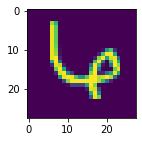

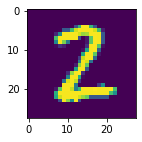

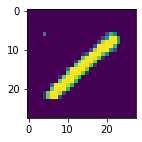

In [5]:
# show 3 random images of data set
for i in (np.random.rand(3)*100).astype('int'):
    plt.figure(figsize=(2, 2))
    plt.imshow(train.values[i][1:].reshape(28,28), interpolation='nearest')
    plt.show()

In [6]:
label = train['label']
train = train.drop('label',axis=1)

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

kfold= KFold(n_splits=10,random_state=42,shuffle=True) #kfold cross validation, 10-subsets
X_train, X_test, y_train, y_test = train_test_split(train_scaled, label, test_size=0.5,random_state=17)

In [42]:
import time

In [43]:
start = time.time()
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
end = time.time()
print(end - start)

0.03769540786743164


In [44]:
start = time.time()
print(f'accuracy of KNN: {accuracy_score(y_test, knn_clf.predict(X_test))}')
end = time.time()
print(end - start)

accuracy of KNN: 0.9598571428571429
6.113224744796753


In [45]:
start = time.time()
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
end = time.time()
print(end - start)

5.826983213424683


In [46]:
start = time.time()
print(f'accuracy of tree: {accuracy_score(y_test, tree_clf.predict(X_test))}')
end = time.time()
print(end - start)

accuracy of tree: 0.843
0.06841206550598145


In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cross_val_score(knn_clf, X_train, y_train, cv=5)

array([0.95547619, 0.95642857, 0.96261905, 0.95738095, 0.96452381])

In [49]:
cross_val_score(tree_clf, X_train, y_train, cv=5)

array([0.83333333, 0.82928571, 0.83047619, 0.82285714, 0.84761905])